<a href="https://colab.research.google.com/github/lasiadhi/Prediction-of-hypoxemia-trend/blob/master/Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#################################################
###### @author: Lasith Adhikari (python 3)  #####
############ Created on Dec 3, 2019 ############
# Generate plots for documents/presentations

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.calibration import calibration_curve
import matplotlib.lines as mlines

pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

In [0]:
# Read data:
FILENAME_XGB_pred = "../Results/Testset_prediction_results_XGB.csv"
FILENAME_RF_pred  = "../Results/Testset_prediction_results_RF.csv"
FILENAME_LR_pred  = "../Results/Testset_prediction_results_LR.csv"

df_XGB = pd.read_csv(FILENAME_XGB_pred, index_col=0)
df_RF = pd.read_csv(FILENAME_RF_pred, index_col=0)
df_LR = pd.read_csv(FILENAME_LR_pred, index_col=0)

In [0]:
df_LR

,is_worse,is_worse_pred
patientunitstayid,,
747560,0,0.080688
2281553,1,0.228458
1346098,0,0.414182
669768,0,0.183426
193346,1,0.228119
...,...,...
3161370,0,0.116887
847499,0,0.220909
1211069,0,0.081712


### Plot ROC all in one:

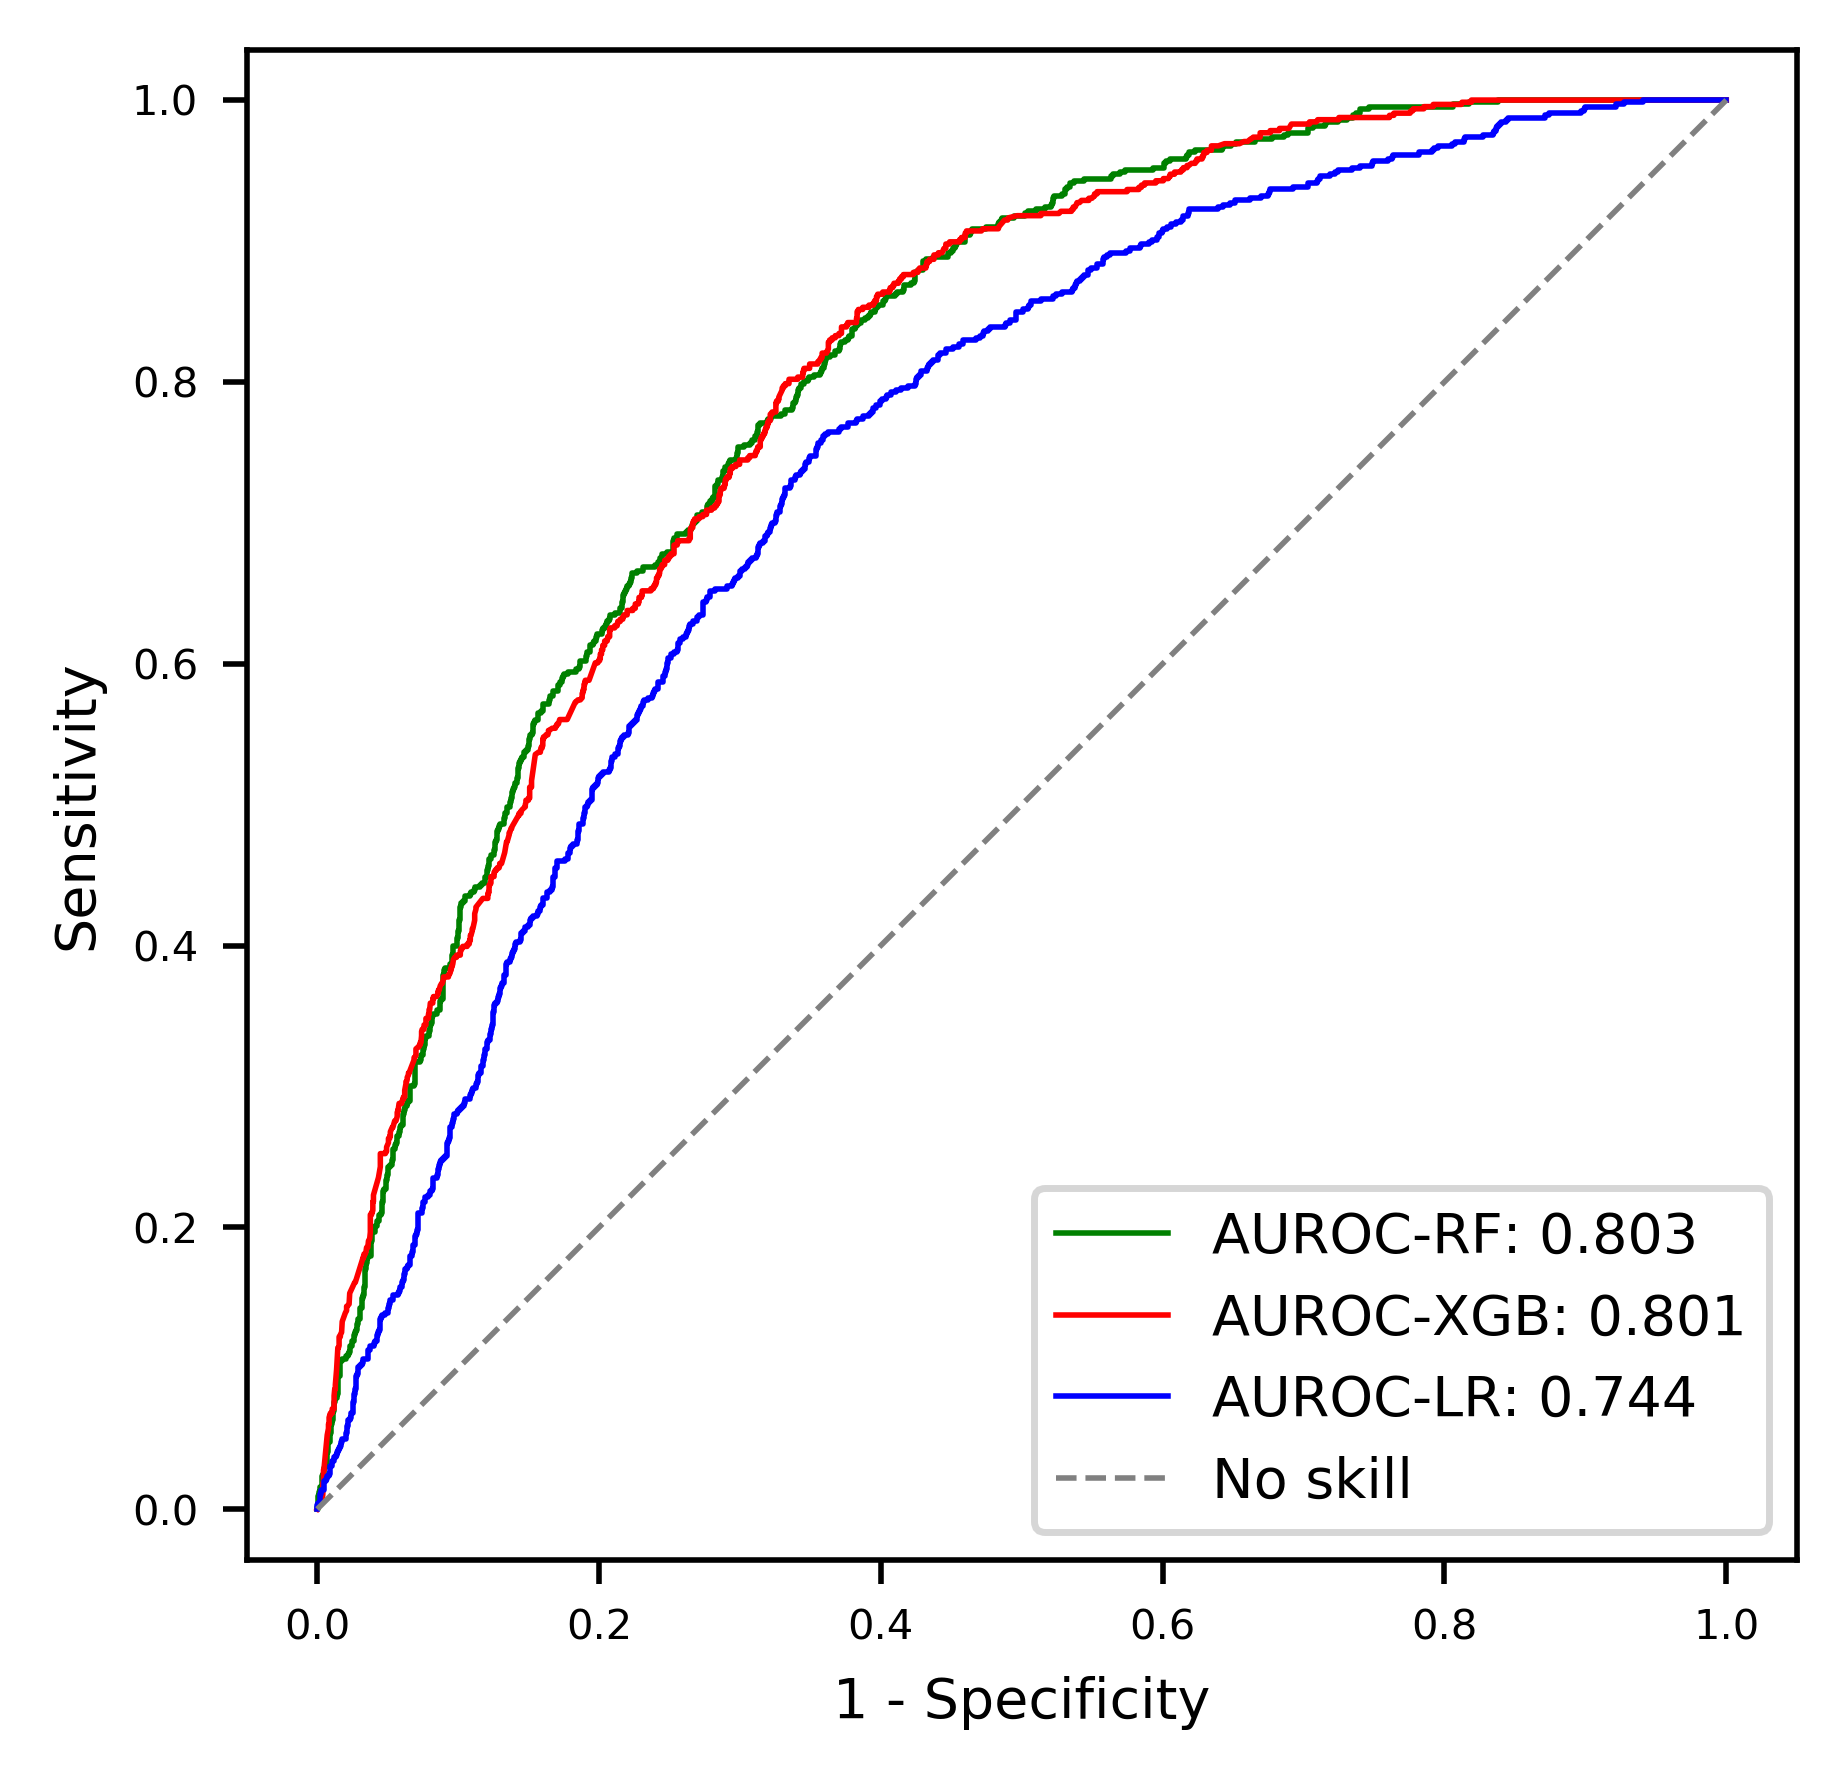

In [0]:
# XGB:
fpr_XGB, tpr_XGB, thresholds = roc_curve(df_XGB['true_outcome'], df_XGB['XGBoost'])
roc_auc_XGB = auc(fpr_XGB, tpr_XGB)

# RF:
fpr_RF, tpr_RF, thresholds = roc_curve(df_RF['true_outcome'], df_RF['RF'])
roc_auc_RF = auc(fpr_RF, tpr_RF)

# LR:
fpr_LR, tpr_LR, thresholds = roc_curve(df_LR['is_worse'], df_LR['is_worse_pred'])
roc_auc_LR = auc(fpr_LR, tpr_LR)

# plotting ROCs
plt.figure(figsize=(4, 4), dpi=500)
plt.plot(fpr_RF, tpr_RF, lw=0.8, color='green', label='AUROC-RF: %0.3f'% roc_auc_RF)
plt.plot(fpr_XGB, tpr_XGB, lw=0.8, color='red', label='AUROC-XGB: %0.3f'% roc_auc_XGB)
plt.plot(fpr_LR, tpr_LR, lw=0.8, color='blue', label='AUROC-LR: %0.3f'% roc_auc_LR)
plt.plot([0,1], [0,1], color='gray', lw=0.8, linestyle='--', label='No skill')
plt.ylabel('Sensitivity', fontsize=8)
plt.xlabel('1 - Specificity', fontsize=8)
#plt.title('ROC curve all classifiers', fontsize=20)
plt.legend(loc='lower right', fontsize=8)
plt.rc('xtick',labelsize=6)
plt.rc('ytick',labelsize=6)
plt.axis('equal')
#plt.savefig('AUC_plot.png', dpi=600)
plt.show()

### Plot PRC all in one:

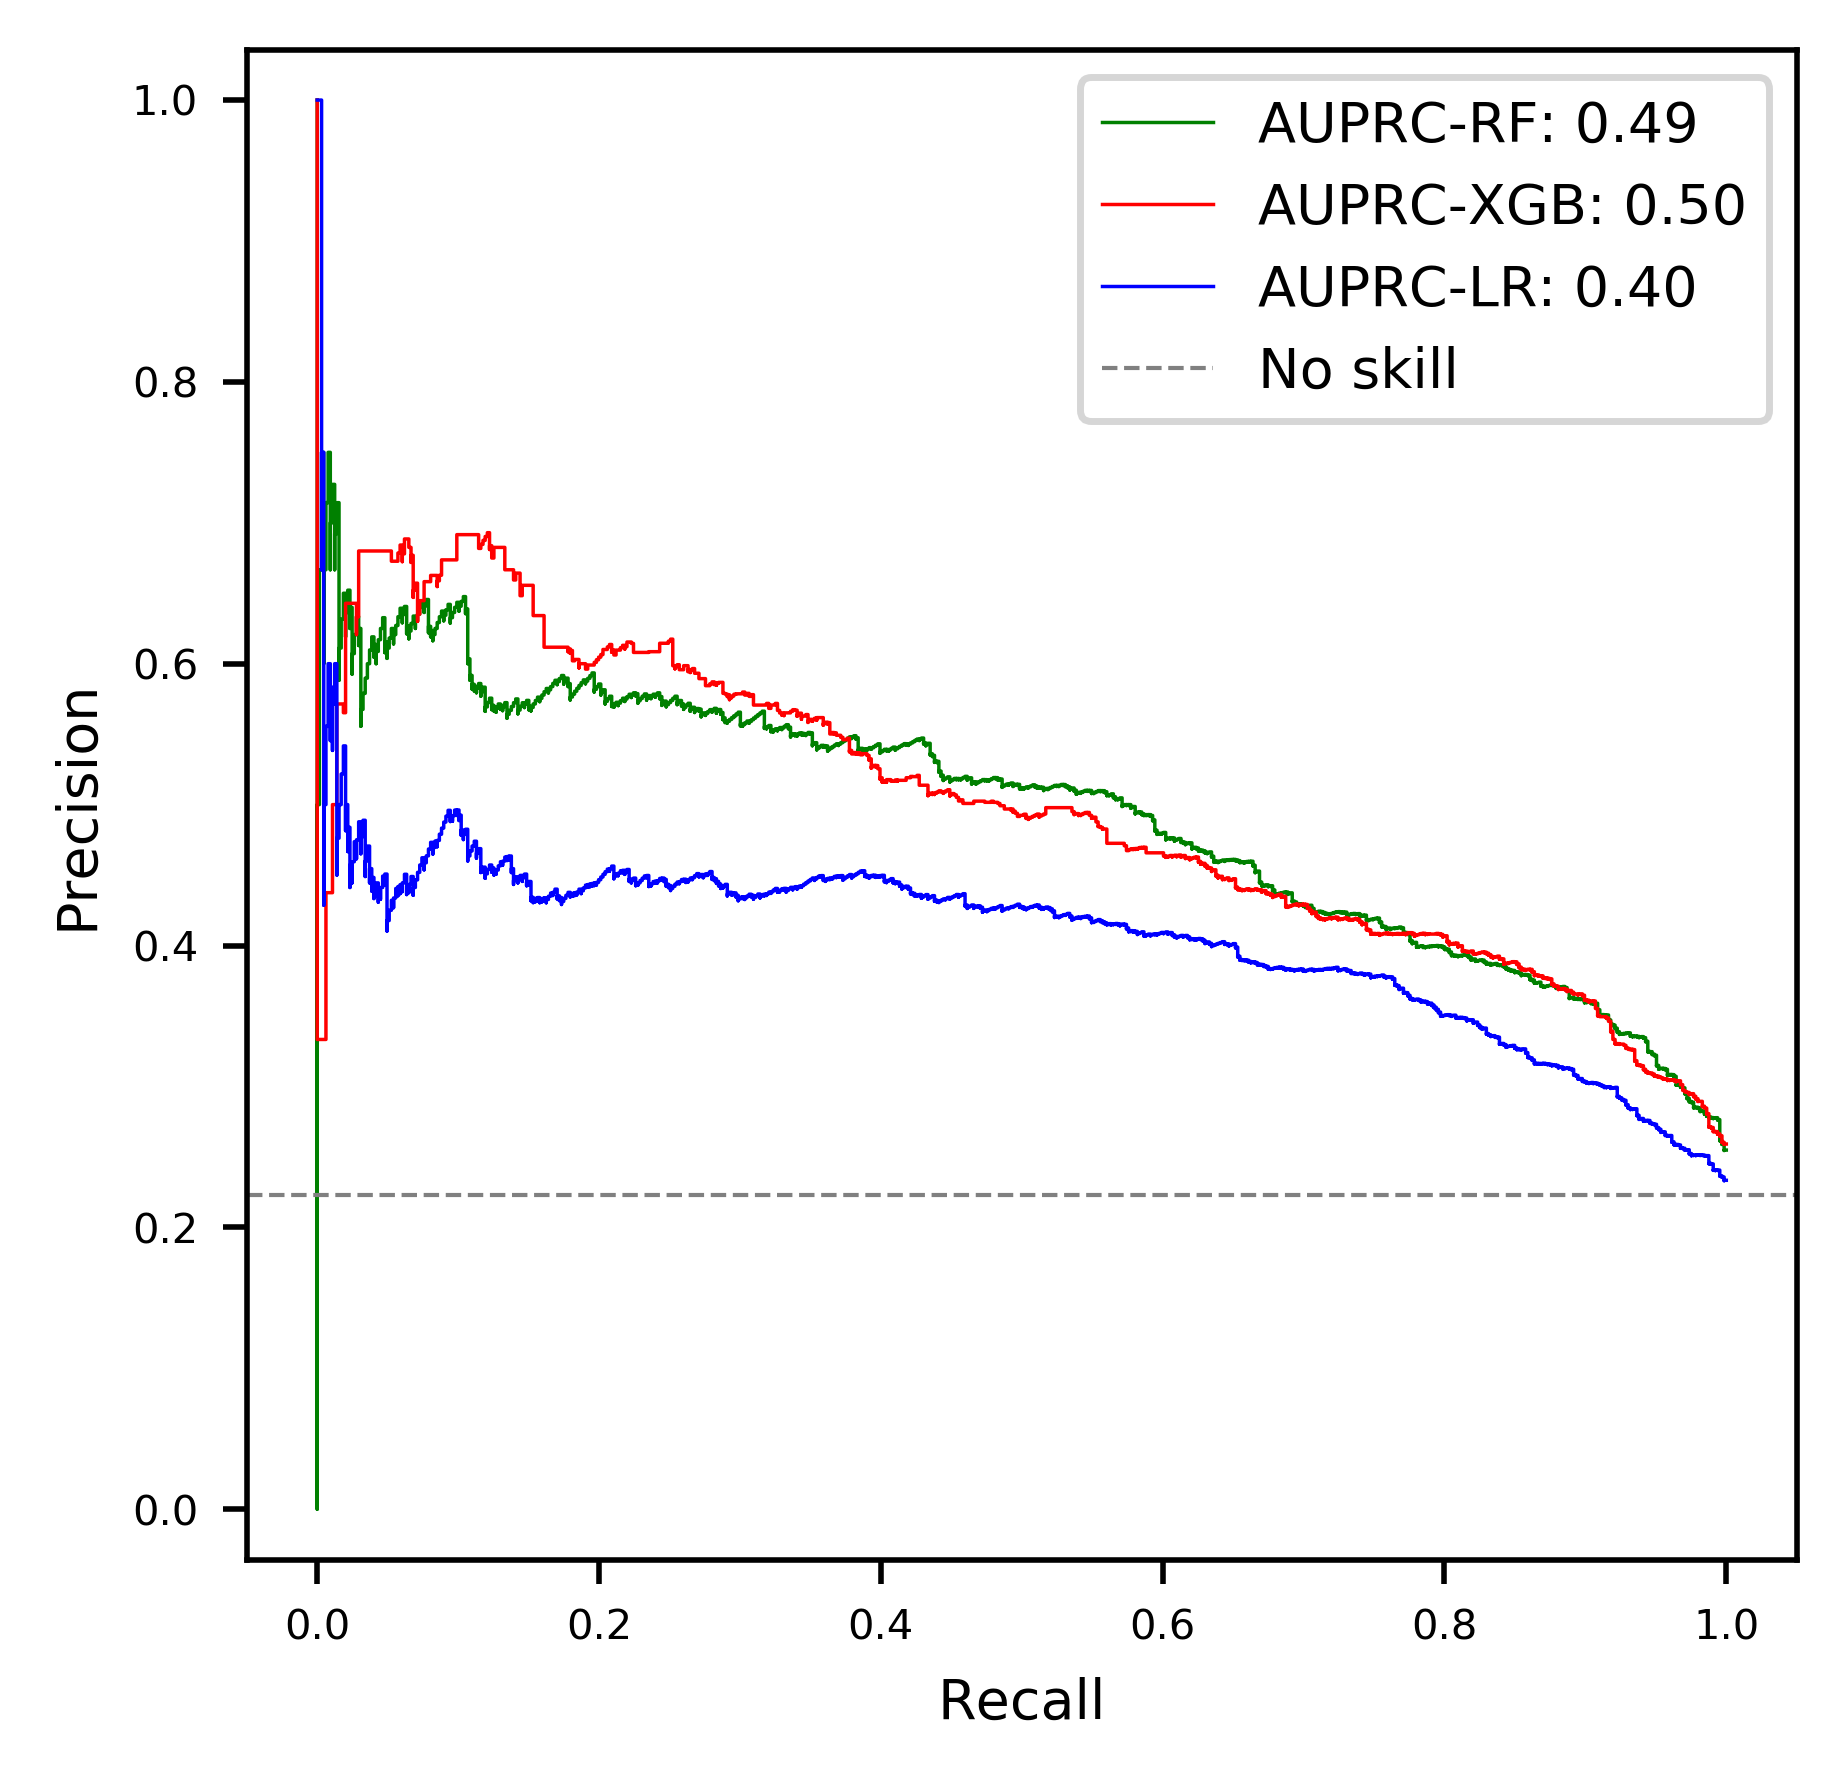

In [0]:
########## Plotting Precision-recall curve ############
# XGB
precision_XGB, recall_XGB, _ = precision_recall_curve(np.array(df_XGB['true_outcome']), df_XGB['XGBoost'])
pr_auc_XGB = auc(recall_XGB, precision_XGB)
# RF
precision_RF, recall_RF, _ = precision_recall_curve(np.array(df_RF['true_outcome']), df_RF['RF'])
pr_auc_RF = auc(recall_RF, precision_RF)
# LR
precision_LR, recall_LR, _ = precision_recall_curve(np.array(df_LR['is_worse']), df_LR['is_worse_pred'])
pr_auc_LR = auc(recall_LR, precision_LR)

plt.figure(figsize=(4, 4), dpi=500)
plt.step(recall_RF, precision_RF, color='green', lw=0.5, where='post', label='AUPRC-RF: %0.2f'% pr_auc_RF)
plt.step(recall_XGB, precision_XGB, color='red', lw=0.5, where='post', label='AUPRC-XGB: %0.2f'% pr_auc_XGB)
plt.step(recall_LR, precision_LR, color='blue', lw=0.5, where='post', label='AUPRC-LR: %0.2f'% pr_auc_LR)
plt.axhline(y = sum(df_RF['true_outcome'])/len(df_RF['true_outcome']), linewidth=0.6, color='gray', linestyle='--', label='No skill')
plt.xlabel('Recall', fontsize=8)
plt.ylabel('Precision', fontsize=8)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.rc('xtick',labelsize=6)
plt.rc('ytick',labelsize=6)
#plt.title('Precision-Recall curves',fontsize=20)
plt.legend(loc='upper right', fontsize=8)
plt.axis('equal')
#plt.savefig('AUPRC_plot.png', dpi=600)
plt.show()

### Calibration plots

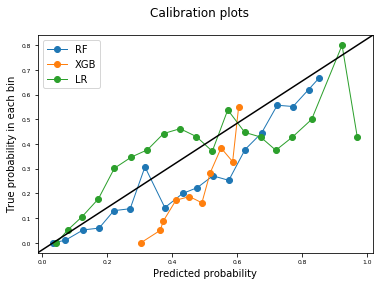

In [0]:
# RF
rf_y_RF, rf_x_RF = calibration_curve(df_RF['true_outcome'], df_RF['RF'], n_bins=20)
# XGB
rf_y_XGB, rf_x_XGB = calibration_curve(df_XGB['true_outcome'], df_XGB['XGBoost'], n_bins=30)
# LR
rf_y_LR, rf_x_LR = calibration_curve(df_LR['is_worse'], df_LR['is_worse_pred'], n_bins=20)

fig, ax = plt.subplots()
plt.plot(rf_x_RF, rf_y_RF, marker='o', linewidth=1, label='RF')
plt.plot(rf_x_XGB, rf_y_XGB, marker='o', linewidth=1, label='XGB')
plt.plot(rf_x_LR, rf_y_LR, marker='o', linewidth=1, label='LR')

# reference line, legends, and axis labels
line      = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plots')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()